# Data Understanding

Notebook ini berisi analisis pemahaman data untuk dataset Iris klasik yang akan digunakan untuk klasifikasi spesies bunga iris.

## 1. Import Library dan Load Dataset

In [1]:
# Install required packages
%pip install seaborn

# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import PyCaret untuk EDA dan classification
try:
    from pycaret.datasets import get_data
    from pycaret.classification import *
    from pycaret.anomaly import *
    print("PyCaret berhasil diimport")
except ImportError:
    print("PyCaret tidak tersedia. Install dengan: pip install pycaret")

# Atur style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

print("Library berhasil diimport")

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [76]:
# Load dataset Iris dari file CSV atau PyCaret
try:
    # Coba load dari file lokal
    df = pd.read_csv('data_iris.csv', delimiter=';')
    
    # Konversi kolom numerik yang menggunakan koma sebagai decimal separator
    numeric_columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
    
    for col in numeric_columns:
        if col in df.columns:
            # Konversi koma ke titik untuk decimal
            df[col] = df[col].astype(str).str.replace(',', '.').astype(float)
    
    # Buat kolom species numerik dan species name
    df['species'] = df['Class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
    df['species_name'] = df['Class'].map({'Iris-setosa': 'setosa', 'Iris-versicolor': 'versicolor', 'Iris-virginica': 'virginica'})
    
    # Rename kolom untuk konsistensi dengan format sklearn
    df = df.rename(columns={
        'sepal length': 'sepal length (cm)',
        'sepal width': 'sepal width (cm)', 
        'petal length': 'petal length (cm)',
        'petal width': 'petal width (cm)'
    })
    
    # Drop kolom yang tidak diperlukan
    if 'id' in df.columns:
        df = df.drop('id', axis=1)
    
    print("Dataset Iris berhasil dimuat dari data_iris.csv")
    
except FileNotFoundError:
    # Jika file tidak ditemukan, gunakan dataset Iris dari PyCaret
    print("File lokal tidak ditemukan. Menggunakan dataset Iris dari PyCaret...")
    try:
        df = get_data('iris')
        df['species'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
        df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
        print("Dataset Iris berhasil dimuat dari PyCaret")
    except:
        print("Error: Tidak dapat memuat dataset dari PyCaret")

print(f"Ukuran dataset: {df.shape[0]} baris, {df.shape[1]} kolom")
print(f"Kolom dataset: {list(df.columns)}")
df.head()

Dataset Iris berhasil dimuat dari data_iris.csv
Ukuran dataset: 150 baris, 7 kolom
Kolom dataset: ['Class', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species', 'species_name']


,Class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,Iris-setosa,5.1,3.5,1.4,0.2,0,setosa
1,Iris-setosa,4.9,3.0,1.4,0.2,0,setosa
2,Iris-setosa,4.7,3.2,1.3,0.2,0,setosa
3,Iris-setosa,4.6,3.1,1.5,0.2,0,setosa
4,Iris-setosa,5.0,3.6,1.4,0.2,0,setosa


## 2. Informasi Dasar Dataset

In [77]:
# Informasi umum dataset
print("=== INFORMASI DATASET IRIS ===")
print(f"Jumlah sampel: {len(df)}")
print(f"Jumlah fitur: {len(df.columns)-2} (tanpa target)")
print(f"Jumlah kelas: {df['species'].nunique()}")
print("\n=== INFO DATAFRAME ===")
df.info()

=== INFORMASI DATASET IRIS ===
Jumlah sampel: 150
Jumlah fitur: 5 (tanpa target)
Jumlah kelas: 3

=== INFO DATAFRAME ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Class              150 non-null    object 
 1   sepal length (cm)  150 non-null    float64
 2   sepal width (cm)   150 non-null    float64
 3   petal length (cm)  150 non-null    float64
 4   petal width (cm)   150 non-null    float64
 5   species            150 non-null    int64  
 6   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 8.3+ KB


In [78]:
# Deskripsi variabel
print("=== DESKRIPSI VARIABEL ===")
print("\n Fitur-fitur dalam dataset:")
feature_descriptions = {
    'sepal length (cm)': 'Panjang sepal (kelopak bunga) dalam cm',
    'sepal width (cm)': 'Lebar sepal (kelopak bunga) dalam cm', 
    'petal length (cm)': 'Panjang petal (mahkota bunga) dalam cm',
    'petal width (cm)': 'Lebar petal (mahkota bunga) dalam cm'
}

for feature, description in feature_descriptions.items():
    print(f"• {feature}: {description}")
    
print("\n Target variable:")
print("• species: Spesies bunga iris (setosa, versicolor, virginica)")

=== DESKRIPSI VARIABEL ===

 Fitur-fitur dalam dataset:
• sepal length (cm): Panjang sepal (kelopak bunga) dalam cm
• sepal width (cm): Lebar sepal (kelopak bunga) dalam cm
• petal length (cm): Panjang petal (mahkota bunga) dalam cm
• petal width (cm): Lebar petal (mahkota bunga) dalam cm

 Target variable:
• species: Spesies bunga iris (setosa, versicolor, virginica)


## 3. Mengecek Tipe Data dan Jenis Variabel

In [79]:
# Analisis jenis variabel berdasarkan klasifikasi
print("=== KLASIFIKASI JENIS VARIABEL ===")
print("\n Teori Jenis Variabel:")
print("• Quantitative (Numerik): Nilai angka, bisa dihitung")
print("• Qualitative (Kategorikal/Faktor): Klasifikasi atau kategori")
print("• Discrete: Nilai terpisah (tanpa nilai antara)")
print("• Continuous: Nilai kontinu (bisa pecahan)")

print("\n" + "="*60)
print("            ANALISIS VARIABEL DATASET IRIS")
print("="*60)

# Analisis setiap variabel
variable_analysis = {
    'sepal length (cm)': {
        'tipe_data': str(df['sepal length (cm)'].dtype),
        'jenis_variabel': 'Quantitative (Numerik)',
        'sub_kategori': 'Continuous',
        'deskripsi': 'Nilai kontinu, bisa berupa pecahan',
        'contoh_nilai': df['sepal length (cm)'].head(3).tolist(),
        'rentang': f"{df['sepal length (cm)'].min():.1f} - {df['sepal length (cm)'].max():.1f} cm"
    },
    'sepal width (cm)': {
        'tipe_data': str(df['sepal width (cm)'].dtype),
        'jenis_variabel': 'Quantitative (Numerik)',
        'sub_kategori': 'Continuous',
        'deskripsi': 'Nilai kontinu, bisa berupa pecahan',
        'contoh_nilai': df['sepal width (cm)'].head(3).tolist(),
        'rentang': f"{df['sepal width (cm)'].min():.1f} - {df['sepal width (cm)'].max():.1f} cm"
    },
    'petal length (cm)': {
        'tipe_data': str(df['petal length (cm)'].dtype),
        'jenis_variabel': 'Quantitative (Numerik)',
        'sub_kategori': 'Continuous',
        'deskripsi': 'Nilai kontinu, bisa berupa pecahan',
        'contoh_nilai': df['petal length (cm)'].head(3).tolist(),
        'rentang': f"{df['petal length (cm)'].min():.1f} - {df['petal length (cm)'].max():.1f} cm"
    },
    'petal width (cm)': {
        'tipe_data': str(df['petal width (cm)'].dtype),
        'jenis_variabel': 'Quantitative (Numerik)',
        'sub_kategori': 'Continuous',
        'deskripsi': 'Nilai kontinu, bisa berupa pecahan',
        'contoh_nilai': df['petal width (cm)'].head(3).tolist(),
        'rentang': f"{df['petal width (cm)'].min():.1f} - {df['petal width (cm)'].max():.1f} cm"
    },
    'species': {
        'tipe_data': str(df['species'].dtype),
        'jenis_variabel': 'Qualitative (Kategorikal)',
        'sub_kategori': 'Discrete (Nominal)',
        'deskripsi': 'Kategori terpisah, tidak ada urutan',
        'contoh_nilai': df['species'].unique().tolist(),
        'rentang': f"{df['species'].nunique()} kategori (0, 1, 2)"
    },
}

# Tampilkan analisis setiap variabel
for i, (var_name, analysis) in enumerate(variable_analysis.items(), 1):
    print(f"\n{i}.  VARIABEL: {var_name.upper()}")
    print(f"   • Tipe Data: {analysis['tipe_data']}")
    print(f"   • Jenis Variabel: {analysis['jenis_variabel']}")
    print(f"   • Sub-kategori: {analysis['sub_kategori']}")
    print(f"   • Deskripsi: {analysis['deskripsi']}")
    print(f"   • Contoh nilai: {analysis['contoh_nilai']}")
    print(f"   • Rentang: {analysis['rentang']}")
    print("   " + "-"*40)

=== KLASIFIKASI JENIS VARIABEL ===

 Teori Jenis Variabel:
• Quantitative (Numerik): Nilai angka, bisa dihitung
• Qualitative (Kategorikal/Faktor): Klasifikasi atau kategori
• Discrete: Nilai terpisah (tanpa nilai antara)
• Continuous: Nilai kontinu (bisa pecahan)

            ANALISIS VARIABEL DATASET IRIS

1.  VARIABEL: SEPAL LENGTH (CM)
   • Tipe Data: float64
   • Jenis Variabel: Quantitative (Numerik)
   • Sub-kategori: Continuous
   • Deskripsi: Nilai kontinu, bisa berupa pecahan
   • Contoh nilai: [5.1, 4.9, 4.7]
   • Rentang: 4.3 - 7.9 cm
   ----------------------------------------

2.  VARIABEL: SEPAL WIDTH (CM)
   • Tipe Data: float64
   • Jenis Variabel: Quantitative (Numerik)
   • Sub-kategori: Continuous
   • Deskripsi: Nilai kontinu, bisa berupa pecahan
   • Contoh nilai: [3.5, 3.0, 3.2]
   • Rentang: 2.0 - 4.4 cm
   ----------------------------------------

3.  VARIABEL: PETAL LENGTH (CM)
   • Tipe Data: float64
   • Jenis Variabel: Quantitative (Numerik)
   • Sub-katego

In [80]:
# Buat tabel ringkasan jenis variabel
print("\n=== TABEL RINGKASAN JENIS VARIABEL ===")

# Buat DataFrame untuk ringkasan
summary_data = []
for var_name, analysis in variable_analysis.items():
    summary_data.append({
        'Nama Variabel': var_name,
        'Tipe Data': analysis['tipe_data'],
        'Jenis Variabel': analysis['jenis_variabel'],
        'Sub-kategori': analysis['sub_kategori'],
        'Rentang/Kategori': analysis['rentang']
    })

summary_df = pd.DataFrame(summary_data)
print("\n Tabel Ringkasan:")
print(summary_df.to_string(index=False))


=== TABEL RINGKASAN JENIS VARIABEL ===

 Tabel Ringkasan:
    Nama Variabel Tipe Data            Jenis Variabel       Sub-kategori     Rentang/Kategori
sepal length (cm)   float64    Quantitative (Numerik)         Continuous         4.3 - 7.9 cm
 sepal width (cm)   float64    Quantitative (Numerik)         Continuous         2.0 - 4.4 cm
petal length (cm)   float64    Quantitative (Numerik)         Continuous         1.0 - 6.9 cm
 petal width (cm)   float64    Quantitative (Numerik)         Continuous         0.1 - 2.5 cm
          species     int64 Qualitative (Kategorikal) Discrete (Nominal) 3 kategori (0, 1, 2)


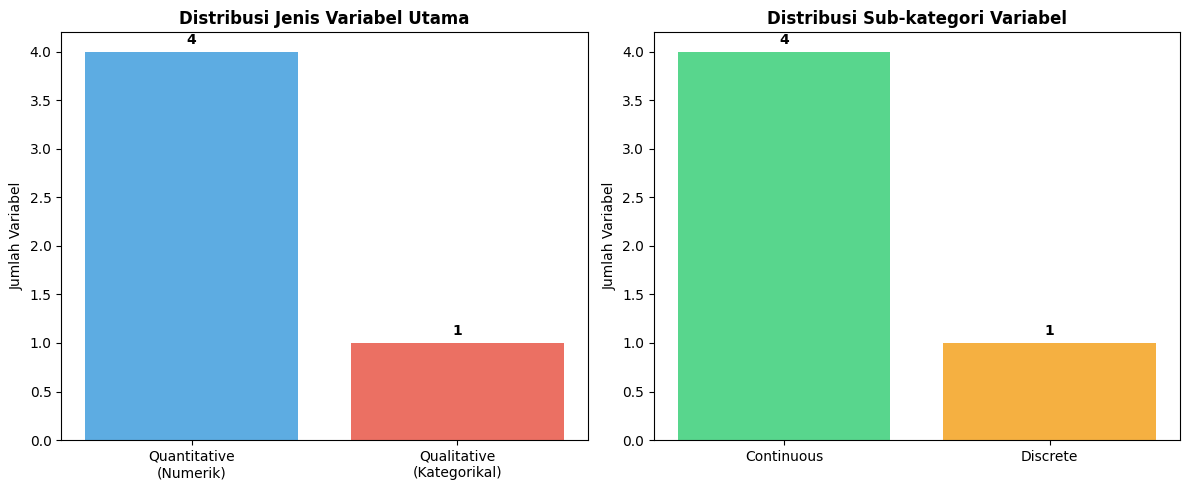

In [81]:
# Visualisasi distribusi tipe variabel
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Hitung jumlah setiap jenis variabel
quantitative_count = sum(1 for analysis in variable_analysis.values() 
                        if 'Quantitative' in analysis['jenis_variabel'])
qualitative_count = sum(1 for analysis in variable_analysis.values() 
                       if 'Qualitative' in analysis['jenis_variabel'])

continuous_count = sum(1 for analysis in variable_analysis.values() 
                      if 'Continuous' in analysis['sub_kategori'])
discrete_count = sum(1 for analysis in variable_analysis.values() 
                    if 'Discrete' in analysis['sub_kategori'])

# Plot 1: Jenis Variabel Utama
categories = ['Quantitative\n(Numerik)', 'Qualitative\n(Kategorikal)']
counts = [quantitative_count, qualitative_count]
colors = ['#3498db', '#e74c3c']

bars1 = axes[0].bar(categories, counts, color=colors, alpha=0.8)
axes[0].set_title('Distribusi Jenis Variabel Utama', fontweight='bold')
axes[0].set_ylabel('Jumlah Variabel')

# Tambahkan nilai di atas bar
for bar, count in zip(bars1, counts):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                str(count), ha='center', va='bottom', fontweight='bold')

# Plot 2: Sub-kategori
subcategories = ['Continuous', 'Discrete']
subcounts = [continuous_count, discrete_count]
subcolors = ['#2ecc71', '#f39c12']

bars2 = axes[1].bar(subcategories, subcounts, color=subcolors, alpha=0.8)
axes[1].set_title('Distribusi Sub-kategori Variabel', fontweight='bold')
axes[1].set_ylabel('Jumlah Variabel')

# Tambahkan nilai di atas bar
for bar, count in zip(bars2, subcounts):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [82]:
# Insight dan kesimpulan tipe data
print("\n" + "="*70)
print("                🔍 INSIGHT JENIS VARIABEL")
print("="*70)

print(f"\n RINGKASAN STATISTIK TIPE VARIABEL:")
print(f"   • Total variabel: {len(variable_analysis)}")
print(f"   • Quantitative (Numerik): {quantitative_count} variabel")
print(f"   • Qualitative (Kategorikal): {qualitative_count} variabel")
print(f"   • Continuous: {continuous_count} variabel")
print(f"   • Discrete: {discrete_count} variabel")

print(f"\n KARAKTERISTIK DATASET:")
print(f"   • Dataset didominasi oleh variabel numerik continuous (fitur pengukuran)")
print(f"   • Semua fitur prediktif adalah quantitative continuous")
print(f"   • Target variable bersifat qualitative discrete (kategori)")
print(f"   • Cocok untuk algoritma machine learning supervised")

print(f"\n IMPLIKASI UNTUK ANALISIS:")
print(f"   • Dapat menggunakan statistik deskriptif (mean, std, dll)")
print(f"   • Perlu normalisasi/standardisasi untuk beberapa algoritma")
print(f"   • Target encoding sudah tersedia (numerik dan nama)")
print(f"   • Siap untuk analisis korelasi dan visualisasi scatter plot")

print("\n" + "="*70)


                🔍 INSIGHT JENIS VARIABEL

 RINGKASAN STATISTIK TIPE VARIABEL:
   • Total variabel: 5
   • Quantitative (Numerik): 4 variabel
   • Qualitative (Kategorikal): 1 variabel
   • Continuous: 4 variabel
   • Discrete: 1 variabel

 KARAKTERISTIK DATASET:
   • Dataset didominasi oleh variabel numerik continuous (fitur pengukuran)
   • Semua fitur prediktif adalah quantitative continuous
   • Target variable bersifat qualitative discrete (kategori)
   • Cocok untuk algoritma machine learning supervised

 IMPLIKASI UNTUK ANALISIS:
   • Dapat menggunakan statistik deskriptif (mean, std, dll)
   • Perlu normalisasi/standardisasi untuk beberapa algoritma
   • Target encoding sudah tersedia (numerik dan nama)
   • Siap untuk analisis korelasi dan visualisasi scatter plot



## 4. Eksplorasi Data Awal

In [83]:
# Statistik deskriptif
print("=== STATISTIK DESKRIPTIF ===")
stats = df.describe()
print(stats.round(2))

=== STATISTIK DESKRIPTIF ===
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count             150.00            150.00             150.00   
mean                5.84              3.05               3.76   
std                 0.83              0.43               1.76   
min                 4.30              2.00               1.00   
25%                 5.10              2.80               1.60   
50%                 5.80              3.00               4.35   
75%                 6.40              3.30               5.10   
max                 7.90              4.40               6.90   

       petal width (cm)  species  
count            150.00   150.00  
mean               1.20     1.00  
std                0.76     0.82  
min                0.10     0.00  
25%                0.30     0.00  
50%                1.30     1.00  
75%                1.80     2.00  
max                2.50     2.00  


In [84]:
# Distribusi kelas
print("=== DISTRIBUSI KELAS ===")
class_counts = df['species'].value_counts()
print(class_counts)
print("\n Persentase:")
class_percentage = df['species'].value_counts(normalize=True) * 100
for species, percentage in class_percentage.items():
    print(f"• {species}: {percentage:.1f}%")

=== DISTRIBUSI KELAS ===
species
0    50
1    50
2    50
Name: count, dtype: int64

 Persentase:
• 0: 33.3%
• 1: 33.3%
• 2: 33.3%


In [85]:
# Cek missing values
print("=== CEK MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\n Dataset tidak memiliki missing values")
else:
    print(f"\n Total missing values: {missing_values.sum()}")

=== CEK MISSING VALUES ===
Class                0
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

 Dataset tidak memiliki missing values


In [86]:
# Cek duplikasi data
print("=== CEK DUPLIKASI DATA ===")
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

if duplicates == 0:
    print(" Tidak ada data duplikat")
else:
    print(f" Terdapat {duplicates} baris duplikat")

=== CEK DUPLIKASI DATA ===
Jumlah baris duplikat: 3
 Terdapat 3 baris duplikat


## 5. Analisis Distribusi Data

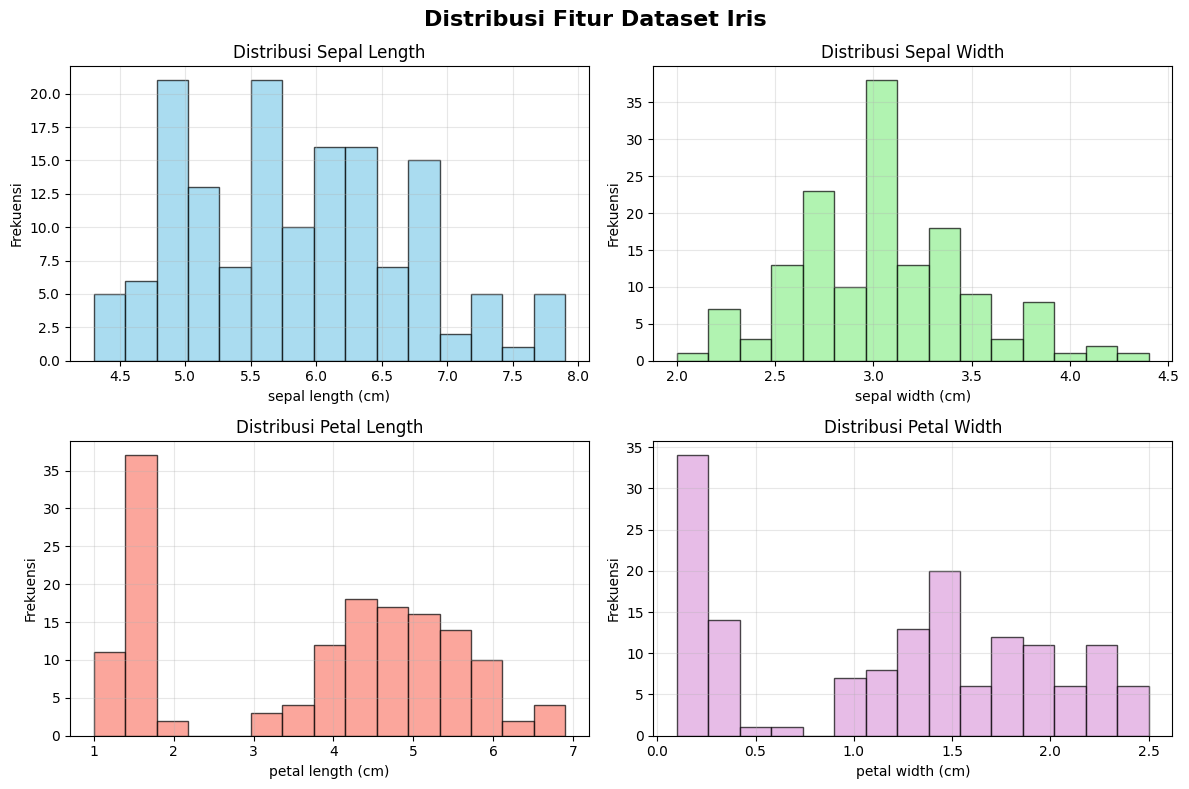

In [87]:
# Visualisasi distribusi fitur
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribusi Fitur Dataset Iris', fontsize=16, fontweight='bold')

features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

for i, (feature, color) in enumerate(zip(features, colors)):
    row = i // 2
    col = i % 2
    
    axes[row, col].hist(df[feature], bins=15, color=color, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'Distribusi {feature.split("(")[0].strip().title()}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frekuensi')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

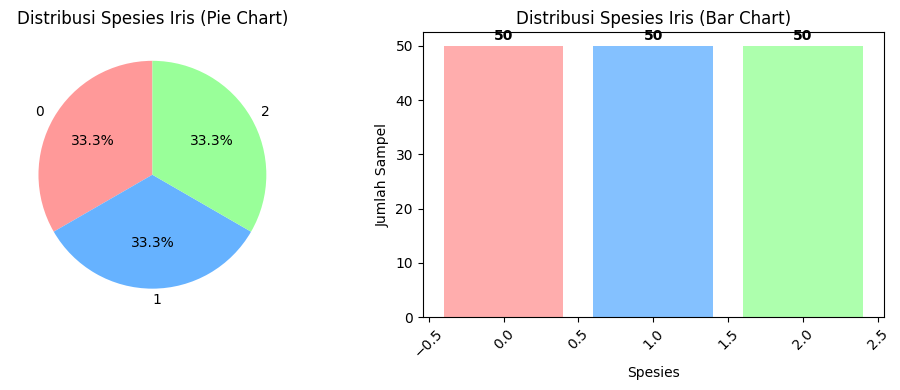

In [88]:
# Distribusi kelas
plt.figure(figsize=(10, 4))

# Pie chart
plt.subplot(1, 2, 1)
class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                 colors=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Distribusi Spesies Iris (Pie Chart)')
plt.ylabel('')

# Bar chart
plt.subplot(1, 2, 2)
bars = plt.bar(class_counts.index, class_counts.values, 
               color=['#FF9999', '#66B2FF', '#99FF99'], alpha=0.8)
plt.title('Distribusi Spesies Iris (Bar Chart)')
plt.xlabel('Spesies')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)

# Tambahkan nilai di atas bar
for bar, count in zip(bars, class_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Analisis Korelasi Antar Fitur

In [89]:
# Matriks korelasi
correlation_matrix = df[features].corr()
print("=== MATRIKS KORELASI ===")
print(correlation_matrix.round(3))

=== MATRIKS KORELASI ===
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)              1.000            -0.109              0.872   
sepal width (cm)              -0.109             1.000             -0.421   
petal length (cm)              0.872            -0.421              1.000   
petal width (cm)               0.818            -0.357              0.963   

                   petal width (cm)  
sepal length (cm)             0.818  
sepal width (cm)             -0.357  
petal length (cm)             0.963  
petal width (cm)              1.000  


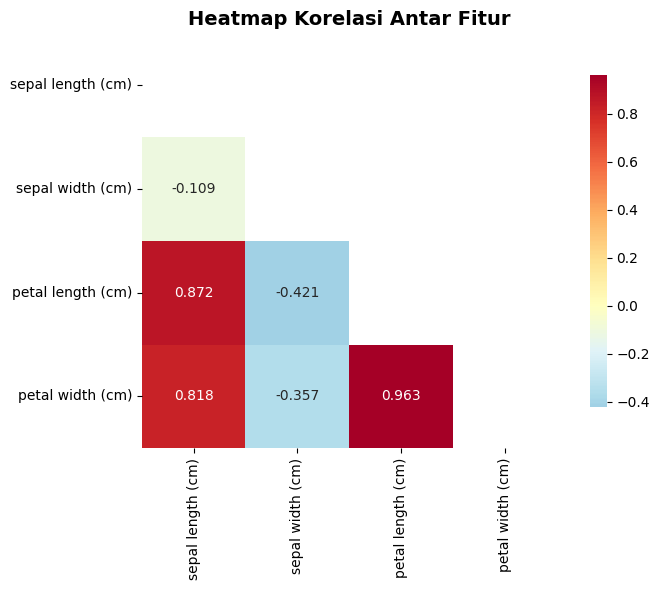

In [90]:
# Heatmap korelasi
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8},
            mask=mask)
plt.title('Heatmap Korelasi Antar Fitur', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [91]:
# Analisis korelasi tertinggi
print("=== ANALISIS KORELASI TERTINGGI ===")
correlation_pairs = []
for i in range(len(features)):
    for j in range(i+1, len(features)):
        corr_value = correlation_matrix.iloc[i, j]
        correlation_pairs.append((features[i], features[j], corr_value))

# Sort berdasarkan nilai absolut korelasi
correlation_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print("\n🔍 Pasangan fitur dengan korelasi tertinggi:")
for i, (feat1, feat2, corr) in enumerate(correlation_pairs[:3]):
    status = "Korelasi Positif Kuat" if corr > 0.7 else "Korelasi Positif Sedang" if corr > 0.3 else "Korelasi Lemah"
    print(f"{i+1}. {feat1.split('(')[0].strip()} vs {feat2.split('(')[0].strip()}: {corr:.3f} ({status})")

=== ANALISIS KORELASI TERTINGGI ===

🔍 Pasangan fitur dengan korelasi tertinggi:
1. petal length vs petal width: 0.963 (Korelasi Positif Kuat)
2. sepal length vs petal length: 0.872 (Korelasi Positif Kuat)
3. sepal length vs petal width: 0.818 (Korelasi Positif Kuat)


## 7. Analisis per Spesies

In [92]:
# Statistik per spesies
print("=== STATISTIK DESKRIPTIF PER SPESIES ===")

# Map numeric species to names
species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

for species in df['species'].unique():
    species_name = species_names[species]
    print(f"\n📊 Spesies: {species_name.upper()}")
    species_data = df[df['species'] == species][features]
    print(species_data.describe().round(2))

=== STATISTIK DESKRIPTIF PER SPESIES ===

📊 Spesies: SETOSA
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count              50.00             50.00              50.00   
mean                5.01              3.42               1.46   
std                 0.35              0.38               0.17   
min                 4.30              2.30               1.00   
25%                 4.80              3.12               1.40   
50%                 5.00              3.40               1.50   
75%                 5.20              3.68               1.58   
max                 5.80              4.40               1.90   

       petal width (cm)  
count             50.00  
mean               0.24  
std                0.11  
min                0.10  
25%                0.20  
50%                0.20  
75%                0.30  
max                0.60  

📊 Spesies: VERSICOLOR
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count              50.00        

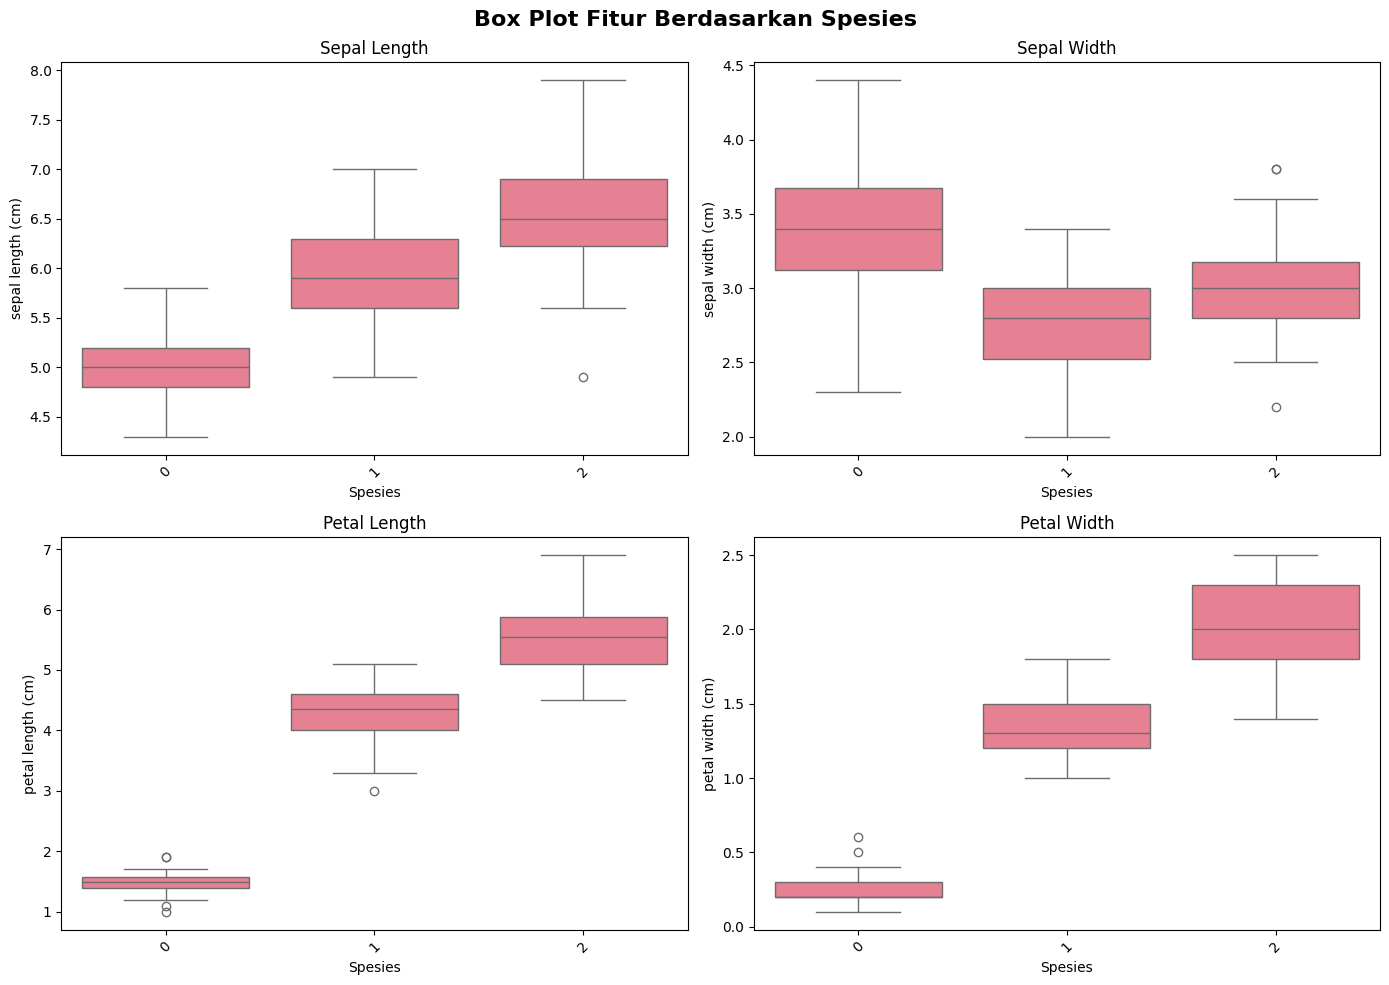

In [93]:
# Box plot per spesies
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Box Plot Fitur Berdasarkan Spesies', fontsize=16, fontweight='bold')

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    
    sns.boxplot(data=df, x='species', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{feature.split("(")[0].strip().title()}')
    axes[row, col].set_xlabel('Spesies')
    axes[row, col].set_ylabel(feature)
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Deteksi Outlier dengan PyCaret Multi-Model (ABOD, KNN, COF)

In [94]:
# Deteksi Outlier dengan PyCaret (3 Model)
print("=== DETEKSI OUTLIER DENGAN PYCARET ===")
print("Menggunakan 3 model: ABOD, KNN, COF")

try:
    # Setup PyCaret untuk anomaly detection
    anomaly_data = df[features].copy()
    
    print("\nSetting up PyCaret environment...")
    try:
        anomaly_setup = setup(data=anomaly_data, session_id=123, verbose=False)
    except:
        anomaly_setup = setup(data=anomaly_data, session_id=123)
    
    # Model yang akan digunakan
    models = ['abod', 'knn', 'cof']
    outlier_results = {}
    
    print("\nMenjalankan deteksi outlier...")
    
    for model_name in models:
        try:
            print(f"- {model_name.upper()}: ", end="")
            
            # Buat dan jalankan model
            model = create_model(model_name)
            results = assign_model(model)
            
            # Hitung outliers
            n_outliers = (results['Anomaly'] == 1).sum()
            percentage = (n_outliers / len(df)) * 100
            outlier_indices = results[results['Anomaly'] == 1].index.tolist()
            
            # Simpan hasil
            outlier_results[model_name] = {
                'count': n_outliers,
                'percentage': percentage,
                'indices': outlier_indices
            }
            
            # Tambah ke dataframe
            df[f'{model_name}_outlier'] = results['Anomaly']
            
            print(f"{n_outliers} outliers ({percentage:.1f}%)")
            
        except Exception as e:
            print(f"Error - {e}")
            outlier_results[model_name] = {'count': 0, 'percentage': 0, 'indices': []}
            df[f'{model_name}_outlier'] = 0
    
    print("\nHasil deteksi outlier berhasil disimpan!")
    
except Exception as e:
    print(f"Error dalam setup PyCaret: {e}")
    print("Pastikan PyCaret sudah terinstall: pip install pycaret")
    
    # Fallback
    for model_name in ['abod', 'knn', 'cof']:
        df[f'{model_name}_outlier'] = 0
    outlier_results = {}

=== DETEKSI OUTLIER DENGAN PYCARET ===
Menggunakan 3 model: ABOD, KNN, COF

Setting up PyCaret environment...

Menjalankan deteksi outlier...
- ABOD: 

8 outliers (5.3%)
- KNN: 

8 outliers (5.3%)
- COF: 

8 outliers (5.3%)

Hasil deteksi outlier berhasil disimpan!


In [95]:
# Perbandingan Hasil 3 Model
print("=== PERBANDINGAN HASIL 3 MODEL ===")

if outlier_results:
    # Tampilkan ringkasan
    print("\nRingkasan Deteksi Outlier:")
    print("-" * 40)
    for model_name, results in outlier_results.items():
        print(f"{model_name.upper():<8}: {results['count']:<3} outliers ({results['percentage']:.1f}%)")
    
    # Hitung consensus (outlier yang terdeteksi oleh minimal 2 model)
    total_outliers = np.zeros(len(df))
    for model_name in ['abod', 'knn', 'cof']:
        if f'{model_name}_outlier' in df.columns:
            total_outliers += df[f'{model_name}_outlier']
    
    # Consensus outliers (minimal 2 model setuju)
    consensus_mask = total_outliers >= 2
    consensus_count = consensus_mask.sum()
    consensus_percentage = (consensus_count / len(df)) * 100
    consensus_indices = df[consensus_mask].index.tolist()
    
    print(f"\nConsensus Outliers (≥2 model setuju):")
    print(f"Jumlah: {consensus_count} ({consensus_percentage:.1f}%)")
    print(f"Index: {consensus_indices}")
    
    # Tambah kolom consensus ke dataframe
    df['consensus_outlier'] = consensus_mask.astype(int)
    df['consensus_score'] = total_outliers
    
    # Analisis per spesies
    if consensus_count > 0:
        print(f"\nDistribusi outlier per spesies:")
        species_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
        
        for species in [0, 1, 2]:
            species_data = df[df['species'] == species]
            species_outliers = species_data[species_data['consensus_outlier'] == 1]
            count = len(species_outliers)
            pct = (count / len(species_data)) * 100
            print(f"- {species_names[species]}: {count} outliers ({pct:.1f}%)")
    
    print(f"\nAnalisis selesai!")
    
else:
    print("Tidak ada hasil outlier untuk dianalisis")
    df['consensus_outlier'] = 0
    df['consensus_score'] = 0

=== PERBANDINGAN HASIL 3 MODEL ===

Ringkasan Deteksi Outlier:
----------------------------------------
ABOD    : 8   outliers (5.3%)
KNN     : 8   outliers (5.3%)
COF     : 8   outliers (5.3%)

Consensus Outliers (≥2 model setuju):
Jumlah: 4 (2.7%)
Index: [41, 106, 117, 131]

Distribusi outlier per spesies:
- setosa: 1 outliers (2.0%)
- versicolor: 0 outliers (0.0%)
- virginica: 3 outliers (6.0%)

Analisis selesai!


=== VISUALISASI HASIL OUTLIER DETECTION ===


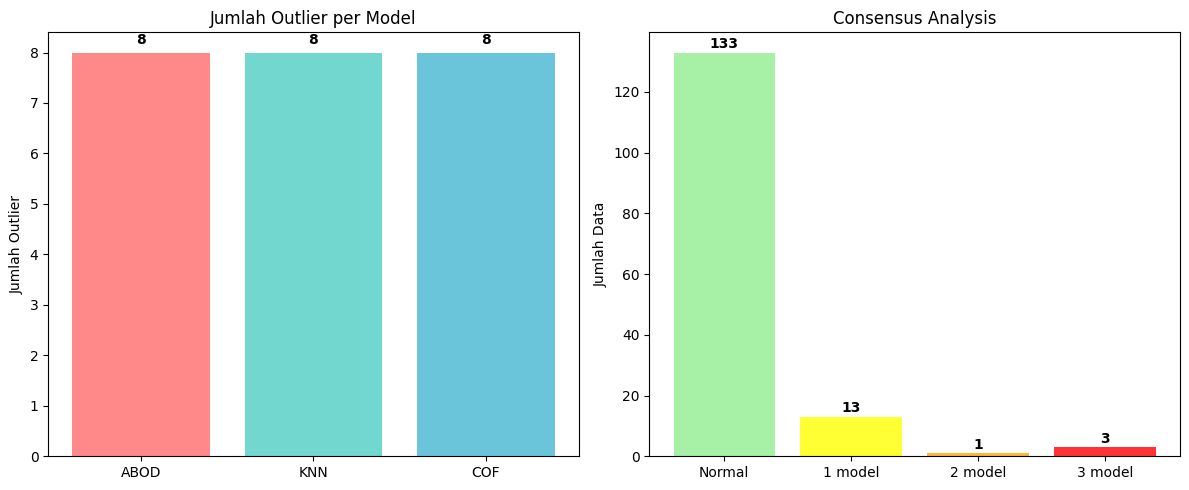

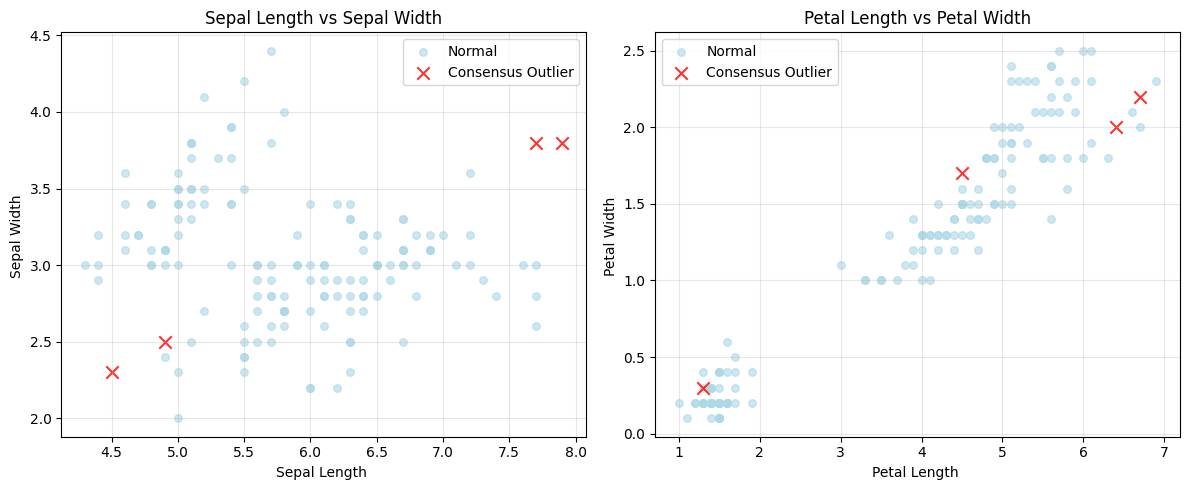

Visualisasi selesai!


In [96]:
# Visualisasi Outlier Detection
print("=== VISUALISASI HASIL OUTLIER DETECTION ===")

try:
    if outlier_results:
        # 1. Bar chart perbandingan jumlah outlier per model
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # Plot 1: Jumlah outlier per model
        models = list(outlier_results.keys())
        counts = [outlier_results[m]['count'] for m in models]
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
        
        bars = axes[0].bar([m.upper() for m in models], counts, color=colors, alpha=0.8)
        axes[0].set_title('Jumlah Outlier per Model')
        axes[0].set_ylabel('Jumlah Outlier')
        
        # Tambah label nilai
        for bar, count in zip(bars, counts):
            axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                        str(count), ha='center', va='bottom', fontweight='bold')
        
        # Plot 2: Consensus analysis
        if 'consensus_score' in df.columns:
            consensus_counts = np.bincount(df['consensus_score'].astype(int))
            labels = [f'{i} model' if i != 1 else '1 model' for i in range(len(consensus_counts))]
            labels[0] = 'Normal'
            
            bars2 = axes[1].bar(labels, consensus_counts, 
                               color=['lightgreen', 'yellow', 'orange', 'red'][:len(consensus_counts)],
                               alpha=0.8)
            axes[1].set_title('Consensus Analysis')
            axes[1].set_ylabel('Jumlah Data')
            
            # Tambah label nilai
            for bar, count in zip(bars2, consensus_counts):
                if count > 0:
                    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                                str(count), ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # 2. Scatter plot outliers
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        # Plot outliers pada 2 feature pairs
        feature_pairs = [
            ('sepal length (cm)', 'sepal width (cm)'),
            ('petal length (cm)', 'petal width (cm)')
        ]
        
        for idx, (feat1, feat2) in enumerate(feature_pairs):
            # Plot normal data
            normal_data = df[df['consensus_outlier'] == 0]
            axes[idx].scatter(normal_data[feat1], normal_data[feat2], 
                            c='lightblue', alpha=0.6, label='Normal', s=30)
            
            # Plot outliers
            if 'consensus_outlier' in df.columns:
                outlier_data = df[df['consensus_outlier'] == 1]
                if len(outlier_data) > 0:
                    axes[idx].scatter(outlier_data[feat1], outlier_data[feat2], 
                                    c='red', alpha=0.8, label='Consensus Outlier', 
                                    s=80, marker='x')
            
            axes[idx].set_xlabel(feat1.replace('(cm)', '').title())
            axes[idx].set_ylabel(feat2.replace('(cm)', '').title())
            axes[idx].set_title(f'{feat1.split("(")[0].strip().title()} vs {feat2.split("(")[0].strip().title()}')
            axes[idx].legend()
            axes[idx].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("Visualisasi selesai!")
        
    else:
        print("Tidak ada data outlier untuk divisualisasikan")
        
except Exception as e:
    print(f"Error dalam visualisasi: {e}")

In [97]:
# Summary dan Kesimpulan Outlier Detection
print("=== SUMMARY OUTLIER DETECTION ===")

try:
    if outlier_results:
        print("\nHasil Deteksi Outlier:")
        print("-" * 50)
        
        # Ringkasan per model
        for model_name, results in outlier_results.items():
            print(f"{model_name.upper()}: {results['count']} outliers ({results['percentage']:.1f}%)")
        
        # Consensus results
        if 'consensus_outlier' in df.columns:
            consensus_count = df['consensus_outlier'].sum()
            consensus_pct = (consensus_count / len(df)) * 100
            print(f"CONSENSUS: {consensus_count} outliers ({consensus_pct:.1f}%)")
        
        print(f"\nPenjelasan Model:")
        print("- ABOD: Deteksi berdasarkan sudut antar data point")
        print("- KNN: Deteksi berdasarkan jarak ke tetangga terdekat") 
        print("- COF: Deteksi berdasarkan konektivitas dalam graph")
        print("- CONSENSUS: Outlier yang terdeteksi minimal 2 model")
        
        # Rekomendasi
        if 'consensus_outlier' in df.columns:
            consensus_pct = (df['consensus_outlier'].sum() / len(df)) * 100
            
            print(f"\nRekomendasi:")
            if consensus_pct < 3:
                print("- Dataset berkualitas baik, outlier sangat sedikit")
                print("- Dapat langsung digunakan untuk modeling")
            elif consensus_pct < 8:
                print("- Ada beberapa outlier, perlu investigasi lebih lanjut")
                print("- Pertimbangkan outlier treatment sebelum modeling")
            else:
                print("- Outlier cukup banyak, perlu cleaning data")
                print("- Gunakan algoritma yang robust terhadap outlier")
        
        print(f"\nDataset siap untuk tahap selanjutnya: Preprocessing dan Modeling")
        
    else:
        print("Tidak ada hasil outlier detection")
        print("Pastikan PyCaret terinstall dengan benar")
        
except Exception as e:
    print(f"Error: {e}")

=== SUMMARY OUTLIER DETECTION ===

Hasil Deteksi Outlier:
--------------------------------------------------
ABOD: 8 outliers (5.3%)
KNN: 8 outliers (5.3%)
COF: 8 outliers (5.3%)
CONSENSUS: 4 outliers (2.7%)

Penjelasan Model:
- ABOD: Deteksi berdasarkan sudut antar data point
- KNN: Deteksi berdasarkan jarak ke tetangga terdekat
- COF: Deteksi berdasarkan konektivitas dalam graph
- CONSENSUS: Outlier yang terdeteksi minimal 2 model

Rekomendasi:
- Dataset berkualitas baik, outlier sangat sedikit
- Dapat langsung digunakan untuk modeling

Dataset siap untuk tahap selanjutnya: Preprocessing dan Modeling


## 9. Kesimpulan Data Understanding

In [98]:
print("=" * 50)
print("           KESIMPULAN DATA UNDERSTANDING")
print("=" * 50)

print("\nINFORMASI DATASET:")
print(f"• Dataset: {len(df)} sampel, {len(features)} fitur")
print(f"• Target: 3 kelas (setosa, versicolor, virginica)")
print(f"• Kualitas: Tidak ada missing values, tidak ada duplikat")
print(f"• Balance: Seimbang (50 sampel per kelas)")

print("\nTIPE DATA:")
print(f"• Semua fitur: Numerik continuous (float)")
print(f"• Target: Kategorikal (discrete)")
print(f"• Siap untuk machine learning")

print("\nKORELASI:")
print(f"• Korelasi tertinggi: petal length vs petal width ({correlation_matrix.loc['petal length (cm)', 'petal width (cm)']:.3f})")
print(f"• Sepal width memiliki korelasi rendah dengan fitur lain")

print("\nOUTLIER DETECTION:")
try:
    if 'abod_outlier' in df.columns:
        abod_count = df['abod_outlier'].sum()
        knn_count = df['knn_outlier'].sum()
        cof_count = df['cof_outlier'].sum()
        
        print(f"• ABOD: {abod_count} outliers")
        print(f"• KNN: {knn_count} outliers")
        print(f"• COF: {cof_count} outliers")
        
        if 'consensus_outlier' in df.columns:
            consensus_count = df['consensus_outlier'].sum()
            print(f"• Consensus: {consensus_count} outliers")
        
        print(f"• Multi-model approach memberikan hasil yang reliable")
    else:
        print(f"• PyCaret tidak tersedia")
except:
    print(f"• Error dalam outlier detection")

print("\nREKOMENDASI:")
print("• Dataset berkualitas tinggi dan siap untuk modeling")
print("• Gunakan feature scaling untuk algoritma berbasis jarak")
print("• Cocok untuk klasifikasi supervised learning")
print("• Hasil outlier detection dapat digunakan untuk preprocessing")

print("\nNEXT STEPS:")
print("• Preprocessing data (scaling, feature engineering)")
print("• Model training dengan PyCaret")
print("• Model evaluation dan comparison")

print("\n" + "=" * 50)

           KESIMPULAN DATA UNDERSTANDING

INFORMASI DATASET:
• Dataset: 150 sampel, 4 fitur
• Target: 3 kelas (setosa, versicolor, virginica)
• Kualitas: Tidak ada missing values, tidak ada duplikat
• Balance: Seimbang (50 sampel per kelas)

TIPE DATA:
• Semua fitur: Numerik continuous (float)
• Target: Kategorikal (discrete)
• Siap untuk machine learning

KORELASI:
• Korelasi tertinggi: petal length vs petal width (0.963)
• Sepal width memiliki korelasi rendah dengan fitur lain

OUTLIER DETECTION:
• ABOD: 8 outliers
• KNN: 8 outliers
• COF: 8 outliers
• Consensus: 4 outliers
• Multi-model approach memberikan hasil yang reliable

REKOMENDASI:
• Dataset berkualitas tinggi dan siap untuk modeling
• Gunakan feature scaling untuk algoritma berbasis jarak
• Cocok untuk klasifikasi supervised learning
• Hasil outlier detection dapat digunakan untuk preprocessing

NEXT STEPS:
• Preprocessing data (scaling, feature engineering)
• Model training dengan PyCaret
• Model evaluation dan comparison
